**<h1>Malware Detection Using Reinforcement Learning</h1>**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import time
import copy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from sklearn.utils import shuffle
from sklearn import metrics

<h3>Loading Dataset</h3>

In [0]:
df = pd.read_csv('drive/My Drive/data.csv')
df.head()

Source  S_Port  ... Bits_received_rate      Label
0    172.30.6.255   57041  ...           0.000000     Benign
1    172.30.6.255   55638  ...       23160.958050     Benign
2  172.30.15.2348   51682  ...      154958.241400     Benign
3       10.0.2.15   50719  ...        7828.391308  Malicious
4  172.30.15.1555   50864  ...        3890.253331     Benign

[5 rows x 15 columns]

In [0]:
df['Label'].value_counts()

Benign       10016
Malicious     2740
Name: Label, dtype: int64

<h3>Train and Test split</h3>

In [0]:
 from sklearn.model_selection import train_test_split

In [0]:
feature_cols = ['Packets', 'Bytes','Packets_sent','Bytes_sent','Packets_received','Bytes_received','Bits_sent_rate','Bits_received_rate']
X = df[feature_cols] #Features
y = df.Label #target

In [0]:
X.describe()

Packets         Bytes  ...  Bits_sent_rate  Bits_received_rate
count  12756.000000  1.275600e+04  ...    12756.000000        1.275600e+04
mean     106.548291  7.771246e+04  ...     4155.814185        2.360222e+04
std     1035.648738  9.520789e+05  ...    12696.567473        1.731471e+05
min        1.000000  5.400000e+01  ...        0.000000        0.000000e+00
25%       11.000000  1.528000e+03  ...      208.816250        2.117688e+02
50%       16.000000  2.882000e+03  ...     1259.064762        1.800297e+03
75%       31.000000  9.749500e+03  ...     3749.825557        5.281123e+03
max    65130.000000  6.326617e+07  ...   406549.700200        1.001004e+07

[8 rows x 8 columns]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

<h3>Data Preprocessing</h2>

In [0]:
from sklearn.preprocessing import normalize 

#Normal
X_train = normalize(X_train, norm = 'l1')
X_test = normalize(X_test, norm = 'l1')

In [0]:
y_train = y_train.map({'Benign': 0, 'Malicious': 1})
y_test = y_test.map({'Benign': 0, 'Malicious': 1})

In [0]:
X_train

array([[0.00235883, 0.46704862, 0.00126366, ..., 0.18070334, 0.03751229,
        0.02367281],
       [0.00235928, 0.4796307 , 0.00104427, ..., 0.36131844, 0.0088852 ,
        0.02713485],
       [0.00125446, 0.38472371, 0.00072627, ..., 0.29545883, 0.05291145,
        0.17513221],
       ...,
       [0.00683285, 0.46007832, 0.00379603, ..., 0.20346698, 0.03691097,
        0.02926669],
       [0.00120649, 0.17318557, 0.00065808, ..., 0.09586079, 0.2907582 ,
        0.36045768],
       [0.00116703, 0.16752173, 0.00063656, ..., 0.09272577, 0.29585108,
        0.3667714 ]])

In [0]:
y_test.value_counts()

0    3033
1     794
Name: Label, dtype: int64

<h2>Using D-Tree Classifier

In [0]:
 from sklearn.tree import DecisionTreeClassifier
 from sklearn import metrics

In [0]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9871962372615626


<h2>Using Logistic Regression</h2>

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_lr = logreg.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8400836164097204


<h2>Using Neural Networks

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    self.fc1 = nn.Linear(8,30)
    self.fc2 = nn.Linear(30,2)

  def forward(self,x):
    x = self.fc1(x)
    x = torch.tanh(x)
    x = self.fc2(x)
    return x

  def predict(self,x):
    pred = F.softmax(self.forward(x),dim=1)
    ans = []
    for t in pred:
      if t[0]>t[1]:
        ans.append(0)
      else:
        ans.append(1)
    return torch.tensor(ans)

  

In [0]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [0]:
train_X = torch.Tensor(X_train)
train_y = torch.from_numpy(y_train.values)
test_X = torch.Tensor(X_test)
test_y = torch.from_numpy(y_test.values)

In [0]:
epochs = 500
losses = []
for i in range(epochs):
  y_pred = model.forward(train_X.float())
  loss = criterion(y_pred,train_y)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(test_X.float()),test_y))

0.9547948784949046


<h2>Using Reinforcement Learning - Q Network</h2>

In [0]:
column_names = ['Packets', 'Bytes','Packets_sent','Bytes_sent','Packets_received','Bytes_received','Bits_sent_rate','Bits_received_rate']

X_train = pd.DataFrame(X_train, columns = column_names)
X_test = pd.DataFrame(X_test, columns = column_names)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [0]:
X_train

Packets     Bytes  ...  Bits_sent_rate  Bits_received_rate
0     0.002359  0.467049  ...        0.037512            0.023673
1     0.002359  0.479631  ...        0.008885            0.027135
2     0.001254  0.384724  ...        0.052911            0.175132
3     0.001265  0.468217  ...        0.014329            0.046708
4     0.001195  0.407397  ...        0.042029            0.140788
...        ...       ...  ...             ...                 ...
8924  0.001351  0.272881  ...        0.181061            0.270474
8925  0.001052  0.151616  ...        0.308983            0.385681
8926  0.006833  0.460078  ...        0.036911            0.029267
8927  0.001206  0.173186  ...        0.290758            0.360458
8928  0.001167  0.167522  ...        0.295851            0.366771

[8929 rows x 8 columns]

MDP Environment

In [0]:
class Environment1:

  def __init__(self, data, label, history_t = 8):
    self.label = label
    self.data = data
    self.history_t = history_t
    self.reset()

  def reset(self):
    self.t = 0
    self.done = False
    self.profits = 0
    self.position = []
    self.history = []
    self.history = [0 for _ in range(self.history_t)]
    return self.history #obs

  def step(self, act):
    reward = abs(act - self.label.iloc[self.t,:]['Label'])
    if reward > 0:
      reward = -1
    else:
      reward = 1
    
    self.t += 1

    self.history = []
    self.history.append(self.data.iloc[self.t, : ]['Packets'])
    self.history.append(self.data.iloc[self.t, : ]['Bytes'])
    self.history.append(self.data.iloc[self.t, : ]['Packets_sent'])
    self.history.append(self.data.iloc[self.t, : ]['Bytes_sent'])
    self.history.append(self.data.iloc[self.t, : ]['Packets_received'])
    self.history.append(self.data.iloc[self.t, : ]['Bytes_received'])
    self.history.append(self.data.iloc[self.t, : ]['Bits_sent_rate'])
    self.history.append(self.data.iloc[self.t, : ]['Bits_received_rate'])

    if (self.t==len(self.data)-1):
      self.done = True

    return self.history, reward, self.done


In [0]:
env = Environment1(X_train, y_train)

Deep Q Network

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Q_Network(nn.Module):
  def __init__(self, obs_len, hidden_size, actions_n):
    super(Q_Network,self).__init__()

    self.fc_val = nn.Sequential(
        nn.Linear(obs_len, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, actions_n),
        nn.Softmax(dim=1)
    )

  def forward(self, x):
    h = self.fc_val(x)
    return (h)

In [0]:
input_size = 8
output_size = 2
hidden_size = 50
USE_CUDA = False
LR = 0.001

In [0]:
Q = Q_Network(input_size, hidden_size, output_size)

In [0]:
Q_ast = copy.deepcopy(Q)

In [0]:
if USE_CUDA:
    Q = Q.cuda()
loss_function = nn.MSELoss()

#defineing the optimizer
optimizer = optim.Adam(list(Q.parameters()), lr=LR)

Deep Q Learning

In [0]:
epoch_num = 30
step_max = len(env.data)
memory_size = 32
batch_size = 8
gamma = 0.97

In [0]:
memory = []  #Replay Memory
total_step = 0
total_rewards = []
total_losses = []
epsilon = 1.0  #exploration rate
epsilon_decrease = 1e-3
epsilon_min = 0.1
start_reduce_epsilon = 200
train_freq = 10
update_q_freq = 20
gamma = 0.97  #discount rate
show_log_freq = 5

In [0]:
accuracy_per_epoch = []

In [0]:
def testing():

  test_env = Environment1(X_test,y_test)
  pobs = test_env.reset()
  test_acts = []
  test_rewards = []
  current_cash_in_hand = []

  for _ in range(len(test_env.data)-1):
    
      pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
      pact = np.argmax(pact.data)
      test_acts.append(pact.item())
            
      obs, reward, done = test_env.step(pact.numpy())
      test_rewards.append(reward)

      pobs = obs
    
  test_acts.append(0)

  accuracy_per_epoch.append(metrics.accuracy_score(y_test,test_acts))

In [0]:
print(accuracy_per_epoch)

[0.9014894172981448, 0.9459106349621114, 0.9558400836164097, 0.9652469297099556, 0.966553436111837, 0.9657695322707082, 0.967598641233342, 0.9691664489155997, 0.9691664489155997, 0.9689051476352234, 0.9686438463548471, 0.9702116540371047, 0.9699503527567285, 0.970472955317481, 0.9720407629997387, 0.970472955317481, 0.9725633655604913, 0.9715181604389862, 0.9683825450744709, 0.967598641233342, 0.9662921348314607, 0.9715181604389862, 0.9689051476352234, 0.9694277501959759, 0.9707342565978573, 0.9715181604389862, 0.9707342565978573, 0.9715181604389862, 0.9725633655604913, 0.9694277501959759]


In [0]:
start = time.time()
for epoch in range(epoch_num):
    print(epoch+1)
    pobs = env.reset()
    step = 0
    done = False
    total_reward = 0
    total_loss = 0

    while not done and step < step_max:

        # select act using exploration
        pact = np.random.randint(2)

        # select act using exploitation
        if np.random.rand() > epsilon:
            pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
            pact = np.argmax(pact.data)
            pact = pact.numpy()

        # act
        obs, reward, done = env.step(pact)

        # add memory
        memory.append((pobs, pact, reward, obs, done))
        if len(memory) > memory_size:
            memory.pop(0)
        
        # train or update q
        if len(memory) == memory_size:
            if total_step % train_freq == 0:
                shuffled_memory = np.random.permutation(memory)   #taking random samples in order to break the correlation between consecutive samples
                memory_idx = range(len(shuffled_memory))
                for i in memory_idx[::batch_size]:
                    batch = np.array(shuffled_memory[i:i+batch_size])
                    b_pobs = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_pact = np.array(batch[:, 1].tolist(), dtype=np.int32)
                    b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                    b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                    b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                    q = Q(torch.from_numpy(b_pobs))
                    q_ = Q_ast(torch.from_numpy(b_obs))
                    maxq = np.max(q_.data.numpy(),axis=1)
                    target = copy.deepcopy(q.data)
                    for j in range(batch_size):
                        target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])   #Bellman equation
                    Q.zero_grad() #clear the previous gradients
                    loss = loss_function(q, target) #compute loss
                    total_loss += loss.data.item()
                    loss.backward() #compute gradients
                    optimizer.step()  #adjust weights
                    
            if total_step % update_q_freq == 0:
                Q_ast = copy.deepcopy(Q)
                
            # update epsilon
            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease

            # next step
            total_reward += reward
            pobs = obs
            step += 1
            total_step += 1

        total_rewards.append(total_reward)
        total_losses.append(total_loss)

        if (epoch+1) % show_log_freq == 0:
            log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
            log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
            elapsed_time = time.time()-start
            print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss, elapsed_time])))
            start = time.time()
    
    testing()
#return Q, total_losses, total_rewards

Streaming output truncated to the last 5000 lines.
30	0.0999999999999992	530682	399651369.0	84612698.2064213	0.014892816543579102
30	0.0999999999999992	530683	399652041.2	84612839.34636852	0.013932466506958008
30	0.0999999999999992	530684	399652713.6	84612980.48631576	0.013698816299438477
30	0.0999999999999992	530685	399653386.2	84613121.62626298	0.013651847839355469
30	0.0999999999999992	530686	399654059.0	84613262.7662102	0.013635635375976562
30	0.0999999999999992	530687	399654732.0	84613403.90615742	0.013823747634887695
30	0.0999999999999992	530688	399655405.2	84613545.04610464	0.013937950134277344
30	0.0999999999999992	530689	399656078.6	84613686.18605188	0.0153656005859375
30	0.0999999999999992	530690	399656752.2	84613827.3259991	0.016696453094482422
30	0.0999999999999992	530691	399657426.0	84613968.8423064	0.02616286277770996
30	0.0999999999999992	530692	399658100.0	84614110.3586137	0.015605688095092773
30	0.0999999999999992	530693	399658774.2	84614251.87492101	0.0150265693664550

In [0]:
print(accuracy_per_epoch[47])

0.9738698719623726


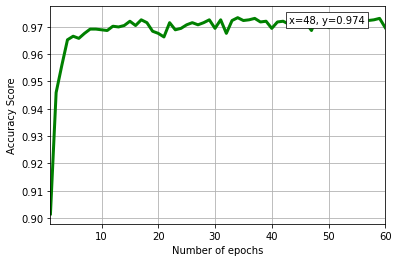

In [0]:
import matplotlib.pyplot as plt 

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]
y = accuracy_per_epoch

plt.plot(x, y, color='green', linewidth = 3)
plt.xlim(1,60)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy Score')
plt.grid(True)

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text= "x={:}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x,y)

plt.savefig('accuracy_graph(1).png')